# KERRY MATRIX
> notebook that creates the kerry datasets.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In [1]:
#collapse 
#IMPORTS
import pandas as pd
from matplotlib import pyplot as plt

rtData = pd.read_csv('https://d14wlfuexuxgcm.cloudfront.net/covid/rt.csv')
dailyData = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')

In [2]:
#collapse 
#SET VARIABLES
today = '2020-08-02'
week = '2020-08-02/2020-07-26'
dateRange = '20200802'

In [3]:
#collapse 
#KERRY LOCATIONS AND POPULATION DATA
kerryLocations = pd.read_csv('../kerry.csv')
kerryLocations.columns = map(str.lower, kerryLocations.columns)
kerryCols=['state', 'population']
kerryLocs = kerryLocations[kerryCols]
print ('Kerry Locations Information being loaded...')
kerryLocs

Kerry Locations Information being loaded...


,state,population
0,AL†,"4,903,185"
1,AR†,"3,017,804"
2,CA*,"39,512,223"
3,FL*,"21,477,737"
4,GA,"10,617,423"
5,IA,"3,155,070"
6,IL,"12,671,821"
7,IN†,"6,732,219"
8,KS,"2,913,314"
9,MD,"6,045,680"


In [4]:
#collapse 
#rtlive data cleaning
rtCleaned = rtData[rtData['date']==today]
rtColumns = ['date', 'region', 'mean']
rtCleaned = rtCleaned[rtColumns]
rtCleaned = rtCleaned.rename(columns = {'region':'state'})
rtCleaned = rtCleaned.sort_values('state', ascending=True)

#PRINT CLEANED DATA
print ('rtLive Data being loaded...')
rtCleaned

rtLive Data being loaded...


,date,state,mean
7999,2020-08-02,AK,1.044038
3674,2020-08-02,AL,1.038194
4947,2020-08-02,AR,1.032027
7165,2020-08-02,AZ,0.868990
7844,2020-08-02,CA,0.887025
6379,2020-08-02,CO,0.998260
952,2020-08-02,CT,0.981955
2076,2020-08-02,DC,1.038579
1594,2020-08-02,DE,0.946947
2723,2020-08-02,FL,0.963125


In [5]:
#collapse 
#DAILY DATA CLEANING
dailyColumns = ['date', 'state', 'death', 'positiveIncrease', 'totalTestResultsIncrease', 'deathIncrease']
dailyData = dailyData[dailyColumns]
dailyData = dailyData.sort_values('state', ascending=True)
dailyCleaned = dailyData[dailyData['date'].astype(str)==dateRange]
dailyCleaned

,date,state,death,positiveIncrease,totalTestResultsIncrease,deathIncrease
168,20200802,AK,24.0,157,4457,0
169,20200802,AL,1627.0,2095,8699,24
170,20200802,AR,458.0,0,0,-2
171,20200802,AS,0.0,0,0,0
172,20200802,AZ,3765.0,1465,7778,18
173,20200802,CA,9356.0,9032,149388,132
174,20200802,CO,1691.0,458,7169,0
175,20200802,CT,4432.0,0,0,0
176,20200802,DC,586.0,69,3411,1
177,20200802,DE,585.0,72,2015,0


In [6]:
#collapse 
#FILTER DATASETS TO KERRY LOCATIONS AND MERGE SETS INTO ONE TABLE

startFile=pd.merge(kerryLocs.state, rtCleaned, on=['state'])
print ('Kerry File Building...')
startFile




Kerry File Building...


,state,date,mean
0,GA,2020-08-02,0.951249
1,IA,2020-08-02,0.987130
2,IL,2020-08-02,1.079792
3,KS,2020-08-02,1.064063
4,MD,2020-08-02,1.031470
5,ME,2020-08-02,0.935425
6,MN,2020-08-02,1.104105
7,MO,2020-08-02,1.162356
8,NY,2020-08-02,0.962816
9,OH,2020-08-02,0.941024


In [7]:
#collapse 
newData=pd.merge(startFile, dailyCleaned, on=['state'])
newData=newData.rename(columns={'date_x':'date'})
colss = ['date', 'state', 'mean', 'death', 'positiveIncrease', 'totalTestResultsIncrease', 'deathIncrease']
newData[colss]

,date,state,mean,death,positiveIncrease,totalTestResultsIncrease,deathIncrease
0,2020-08-02,GA,0.951249,3840.0,3165,28555,15
1,2020-08-02,IA,0.987130,876.0,516,5148,4
2,2020-08-02,IL,1.079792,7714.0,1467,38945,14
3,2020-08-02,KS,1.064063,358.0,0,0,0
4,2020-08-02,MD,1.031470,3515.0,909,15432,9
5,2020-08-02,ME,0.935425,123.0,21,2328,0
6,2020-08-02,MN,1.104105,1654.0,759,12073,8
7,2020-08-02,MO,1.162356,1253.0,582,5722,0
8,2020-08-02,NY,0.962816,25170.0,531,58961,6
9,2020-08-02,OH,0.941024,3529.0,944,24643,14


In [8]:
#collapse  
#ADDING CASES, TESTING, AND DEATHS TO DATA FILE
dateRange='20200802'
cols = ['date', 'state', 'death', 'positiveIncrease', 'totalTestResultsIncrease', 'deathIncrease']
dailyData = dailyData[cols]
dailyData = dailyData.sort_values('state', ascending=True)
dailyData = dailyData[dailyData['date'].astype(str)==dateRange]
dailyData
newData=pd.merge(startFile, dailyData, on=['state'])
newData=newData.rename(columns={'date_x':'date'})
colss = ['date', 'state', 'mean', 'death', 'positiveIncrease', 'totalTestResultsIncrease', 'deathIncrease']

newData[colss]

,date,state,mean,death,positiveIncrease,totalTestResultsIncrease,deathIncrease
0,2020-08-02,GA,0.951249,3840.0,3165,28555,15
1,2020-08-02,IA,0.987130,876.0,516,5148,4
2,2020-08-02,IL,1.079792,7714.0,1467,38945,14
3,2020-08-02,KS,1.064063,358.0,0,0,0
4,2020-08-02,MD,1.031470,3515.0,909,15432,9
5,2020-08-02,ME,0.935425,123.0,21,2328,0
6,2020-08-02,MN,1.104105,1654.0,759,12073,8
7,2020-08-02,MO,1.162356,1253.0,582,5722,0
8,2020-08-02,NY,0.962816,25170.0,531,58961,6
9,2020-08-02,OH,0.941024,3529.0,944,24643,14


In [9]:
#collapse 
startFile=pd.merge(kerryLocations.state, rtCleaned, on=['state'])
print ('Kerry File Building...')
startFile

Kerry File Building...


,state,date,mean
0,GA,2020-08-02,0.951249
1,IA,2020-08-02,0.987130
2,IL,2020-08-02,1.079792
3,KS,2020-08-02,1.064063
4,MD,2020-08-02,1.031470
5,ME,2020-08-02,0.935425
6,MN,2020-08-02,1.104105
7,MO,2020-08-02,1.162356
8,NY,2020-08-02,0.962816
9,OH,2020-08-02,0.941024


In [12]:
#collapse  
read = pd.read_csv('../us.csv')
read.shape
read.head()
fee=['Kerry Locations', 'State', 'Population', 'SD Past']
tre=read[fee]
tre

,Kerry Locations,State,Population,SD Past
0,x,AK,"731,545",27.0
1,"Montgomery, AL",AL†,"4,903,185",29.0
2,"Hot Springs, AR",AR†,"3,017,804",26.0
3,x,AZ*,"7,278,717",34.0
4,"Commerce, CA\nMecca, CA\nMontebello, CA\nUnion...",CA*,"39,512,223",37.0
5,x,CO*,"5,758,736",28.0
6,x,CT†,"3,565,287",27.0
7,x,DC,"705,749",57.0
8,x,DE†,"973,764",28.0
9,"Lakeland, FL\nPlant City, FL",FL*,"21,477,737",34.0


TypeError: 'value' must be an instance of str or bytes, not a float

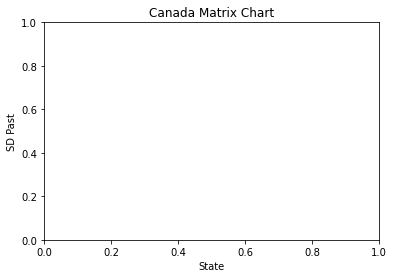

In [13]:
#collapse 
plt.title("Canada Matrix Chart")
plt.xlabel("State")
plt.ylabel("SD Past")
x = tre["SD Past"]
y = tre["State"]

plt.plot(x,y)

In [14]:
#collapse 
mer = pd.merge(rtChanged, dailyData, on=['state'])

NameError: name 'rtChanged' is not defined

In [15]:
#collapse 
mer

NameError: name 'mer' is not defined

In [16]:
#collapse 
meg = pd.merge(kerryLocations, mer, on='state')
meg = meg.rename(columns={'date_x':'date'})
coll = ['state',  'mean', 'death', 'positiveIncrease', 'totalTestResultsIncrease', 'deathIncrease']
mew = meg[coll]
print ('Kerry Locations')
print ('Matrix Report')
mew

NameError: name 'mer' is not defined

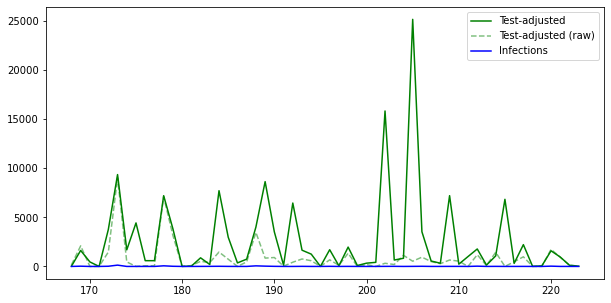

In [17]:
#collapse  
#chart over time
fig, ax = plt.subplots(figsize=(10,5))
dailyData.death.plot(c="g", label="Test-adjusted")
dailyData.positiveIncrease.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
dailyData.deathIncrease.plot(c="b", label="Infections")
fig.set_facecolor('w')
ax.legend();